# 現場ですぐ使えるデータ分析
* ビットコインの終値の2017/1/1〜2017/6/14のデータ
* 結論、ビットコインには自己回帰モデルは導入できなかった（時間依存の関係がない）
* どの段階で分析を止めるのかはよくわからない。

# 2-1 時系列データを観察する

In [1]:
data <- read.csv("input/external/bitcoin.csv")

In [2]:
# bitcoinの終値（ドル）
data

date,price
2017/1/1,993.0
2017/1/2,1011.5
2017/1/3,1020.7
2017/1/4,1130.3
2017/1/5,1007.0
2017/1/6,895.7
2017/1/7,909.0
2017/1/8,923.3
2017/1/9,902.7
2017/1/10,907.0


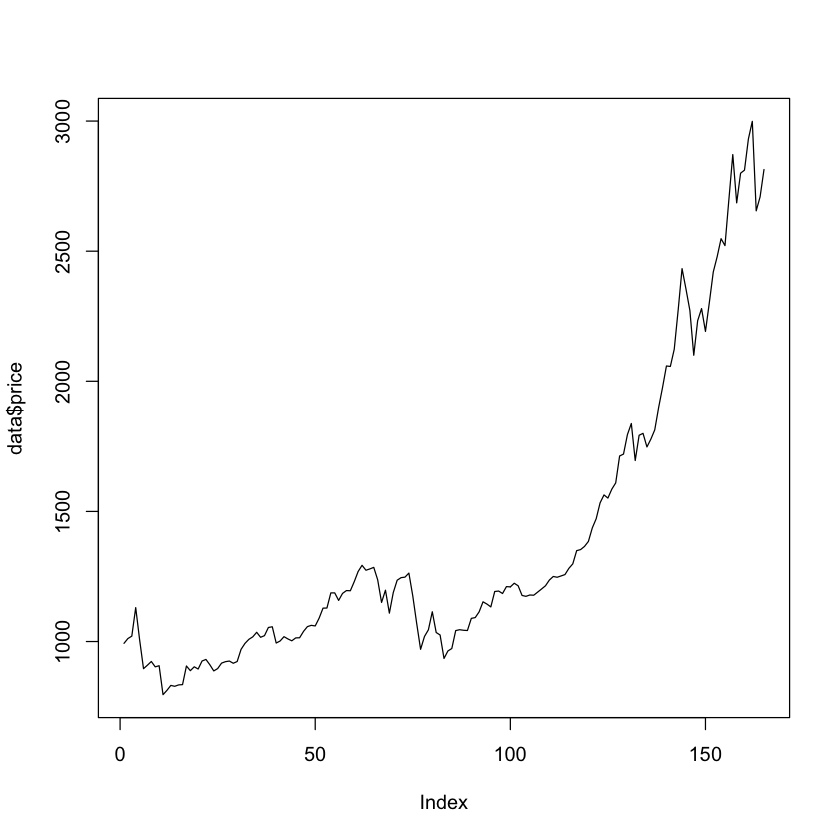

In [3]:
plot(data$price,type="l")

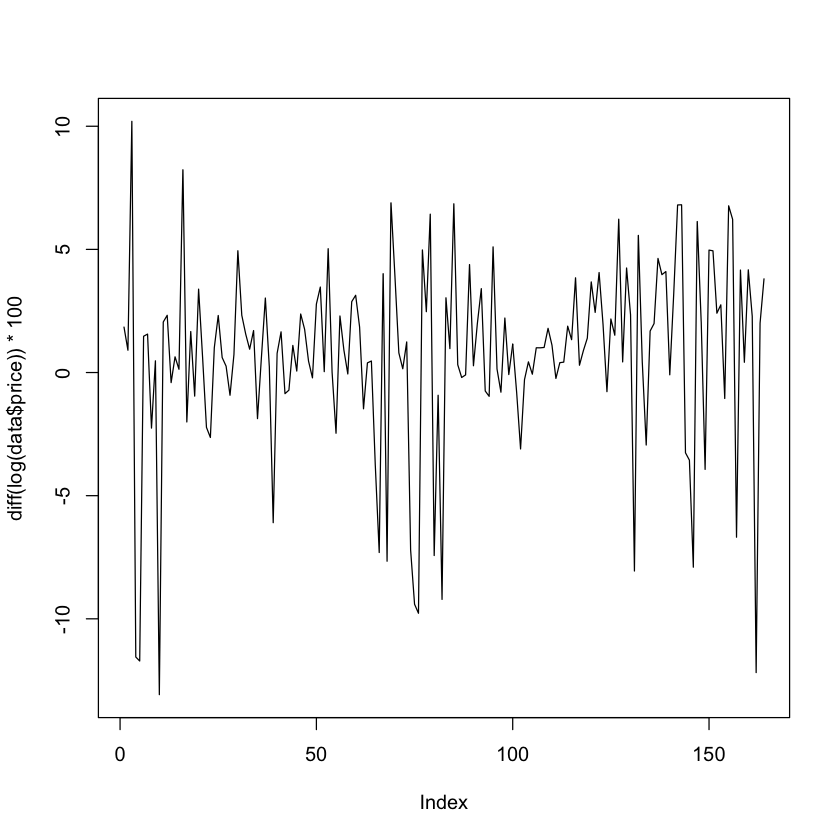

In [4]:
plot(diff(log(data$price))*100,type="l")

* 収益率の平均データを保存しておく

In [5]:
data2 = diff(log(data$price))*100

# 2-2 時系列データの分布と要約

In [6]:
mean(data2)

[1] 0.6350979

In [7]:
sd(data2)

[1] 3.94745

* 価格変動は書籍の銘柄と比べても大きい

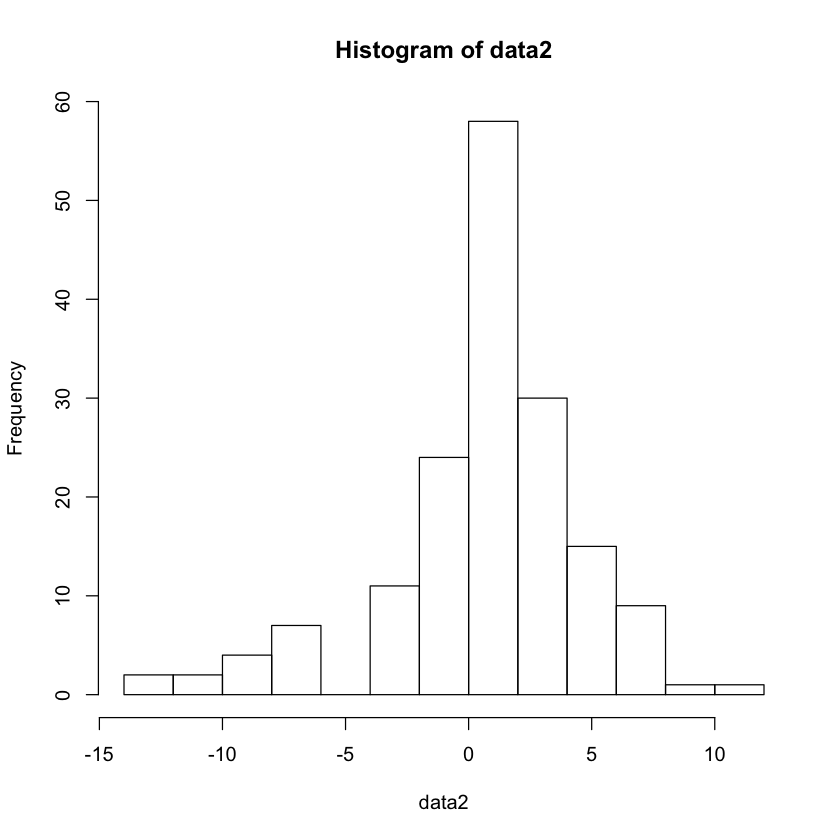

In [8]:
hist(data2)

* 書籍の銘柄と比べて分布の裾が重い

# 2-3 統計的仮説検定について

In [9]:
shapiro.test(data2)


	Shapiro-Wilk normality test

data:  data2
W = 0.90292, p-value = 6.116e-09


* p-valueが低く、帰無仮説「対象データが正規分布に従う」が棄却される。

In [10]:
library(tseries)

In [11]:
runs.test(as.factor(data2<mean(data2)))


	Runs Test

data:  as.factor(data2 < mean(data2))
Standard Normal = -0.12412, p-value = 0.9012
alternative hypothesis: two.sided


* 「＋ーの並び方に規則性はない」が受容される

# 2-4 時間依存の発見

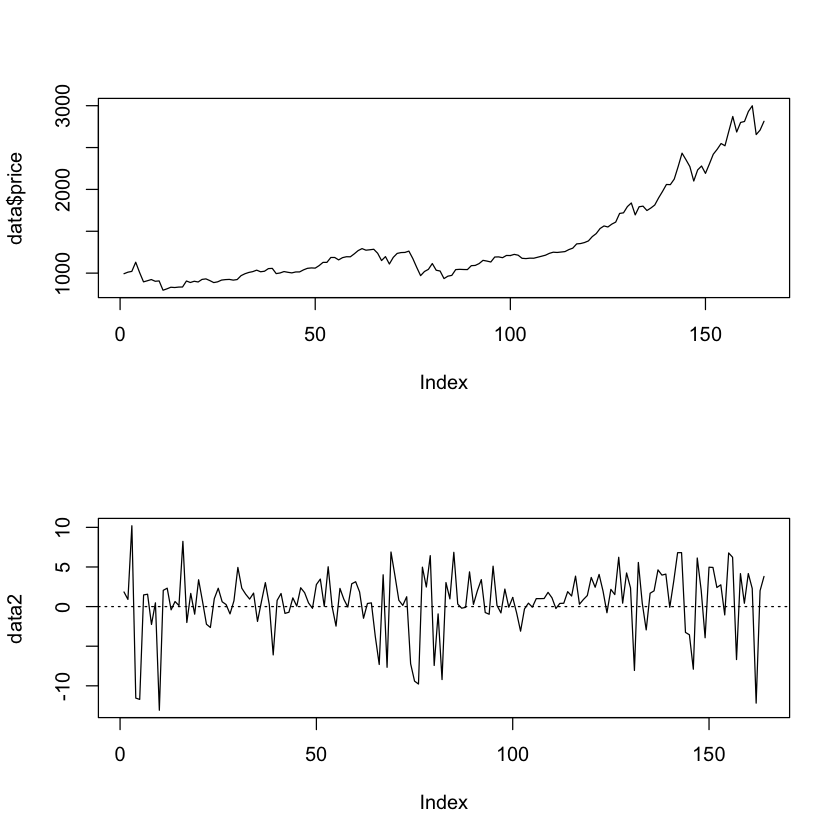

In [12]:
par(mfcol=c(2,1))
plot(data$price,type="l")
plot(data2,type="l")
abline(h=0,lty=3)

* 株価の変動が大きい時期と小さい時期がある。
* 上昇傾向を続ける時期（80〜120）もあった。

# 3-1 時間依存の発見

In [13]:
length(data2)

[1] 164

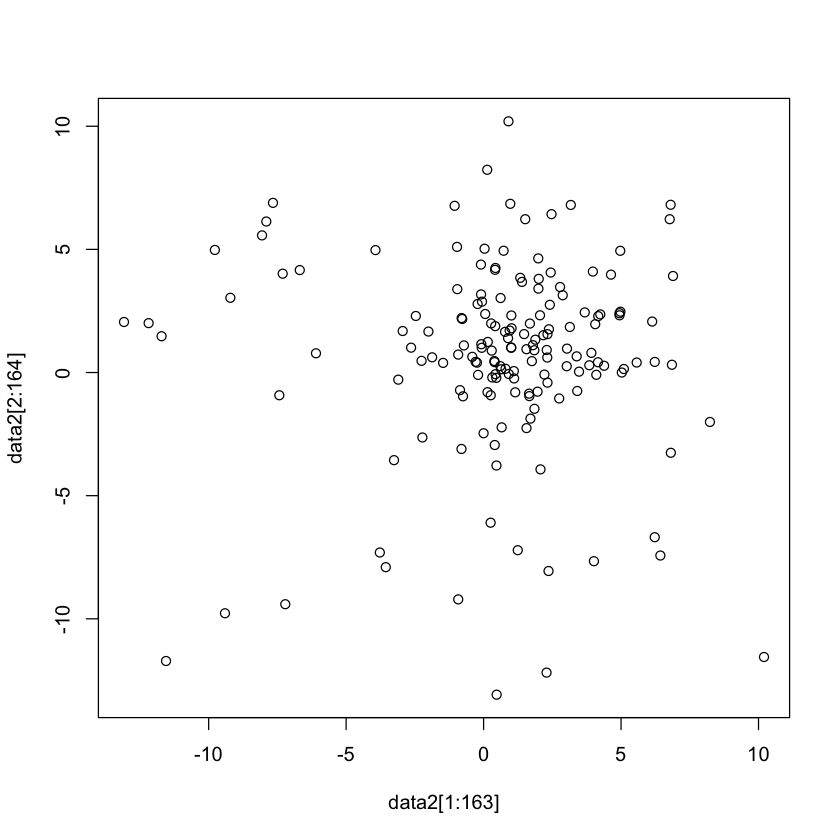

In [14]:
plot(x=data2[1:163],y=data2[2:164])

In [15]:
cor(x=data2[1:163],y=data2[2:164])

[1] 0.004186549

* 1つずれでの相関はなさそう

In [16]:
acf(data2,plot=F)


Autocorrelations of series ‘data2’, by lag

     0      1      2      3      4      5      6      7      8      9     10 
 1.000  0.004 -0.063 -0.071 -0.010  0.088  0.069 -0.124  0.100 -0.015  0.035 
    11     12     13     14     15     16     17     18     19     20     21 
-0.086 -0.019  0.101  0.040 -0.076  0.078  0.021  0.089 -0.058 -0.048 -0.004 
    22 
 0.013 

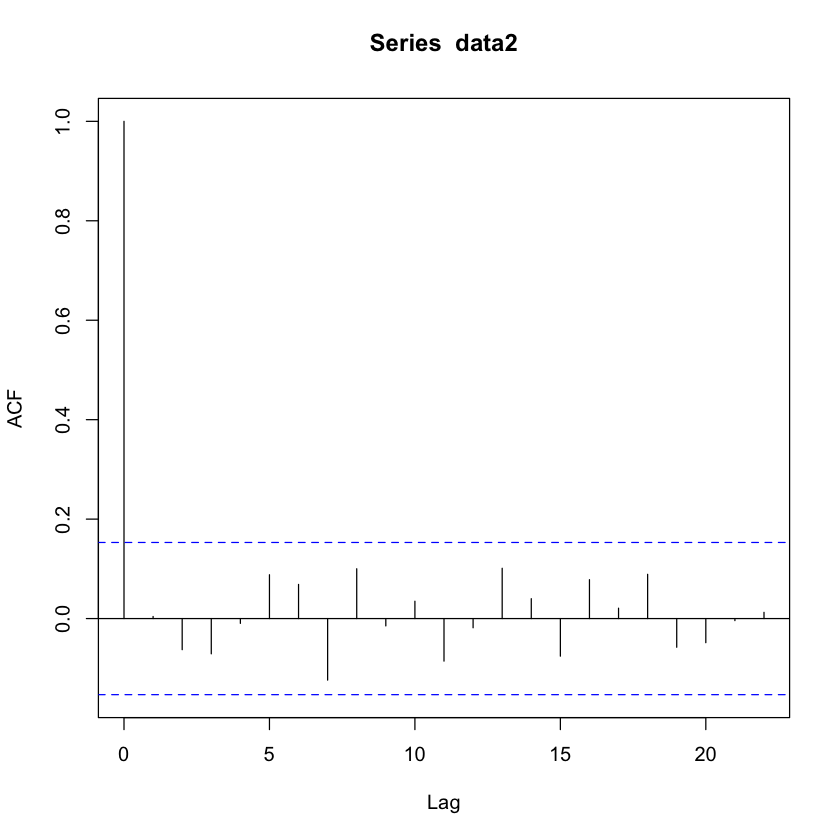

In [17]:
acf(data2)

### 偏自己相関係数

In [18]:
acf(data2,plot=F,type="partial")


Partial autocorrelations of series ‘data2’, by lag

     1      2      3      4      5      6      7      8      9     10     11 
 0.004 -0.063 -0.071 -0.013  0.080  0.063 -0.117  0.123 -0.020  0.027 -0.092 
    12     13     14     15     16     17     18     19     20     21     22 
 0.005  0.098 -0.002 -0.048  0.094  0.047  0.049 -0.055 -0.002 -0.012 -0.039 

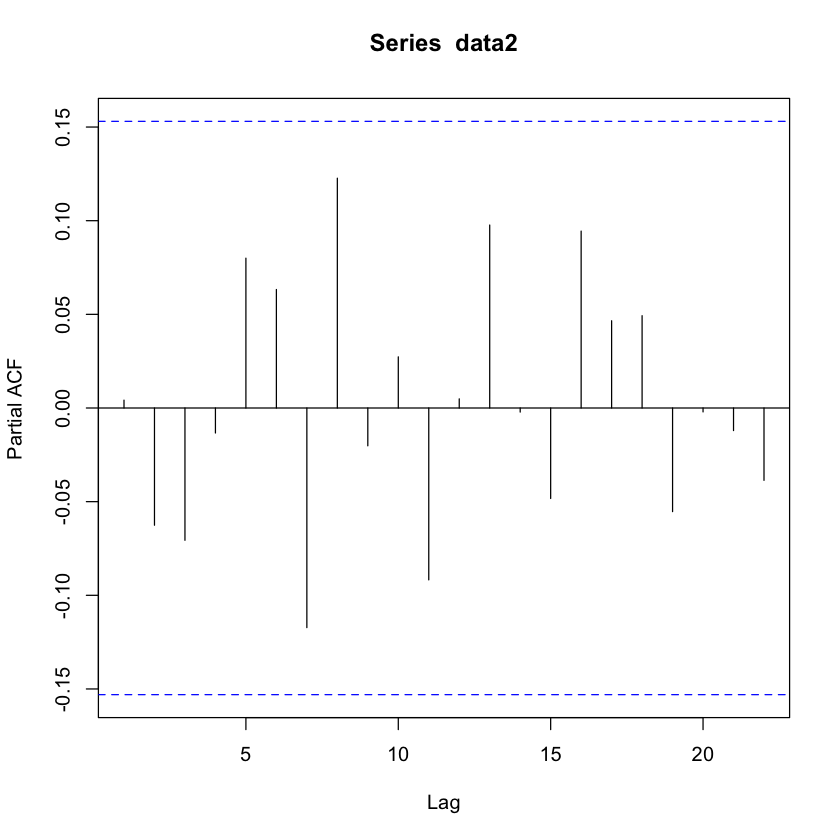

In [19]:
acf(data2,type="partial")

### Ljung-Box検定

In [20]:
Box.test(data2,type="L")


	Box-Ljung test

data:  data2
X-squared = 0.002927, df = 1, p-value = 0.9569


* 帰無仮説「自己相関関係を有していない」は棄却されない。自己相関関係を有していないなら、自己回帰モデルは導入できないのでは。
* 現場では、Ljung-Boxで「自己相関関係を有していない」が棄却されないなら、時系列データ分析は諦める？

# 3-2 時系列データの性質

## 平均

In [21]:
mean(data2)

[1] 0.6350979

## 分散、自己共分散

In [22]:
acf(data2,plot=F,type="cov")


Autocovariances of series ‘data2’, by lag

      0       1       2       3       4       5       6       7       8       9 
15.4873  0.0648 -0.9689 -1.0979 -0.1491  1.3645  1.0635 -1.9168  1.5509 -0.2279 
     10      11      12      13      14      15      16      17      18      19 
 0.5398 -1.3247 -0.2866  1.5664  0.6188 -1.1703  1.2111  0.3230  1.3782 -0.8928 
     20      21      22 
-0.7510 -0.0639  0.1939 

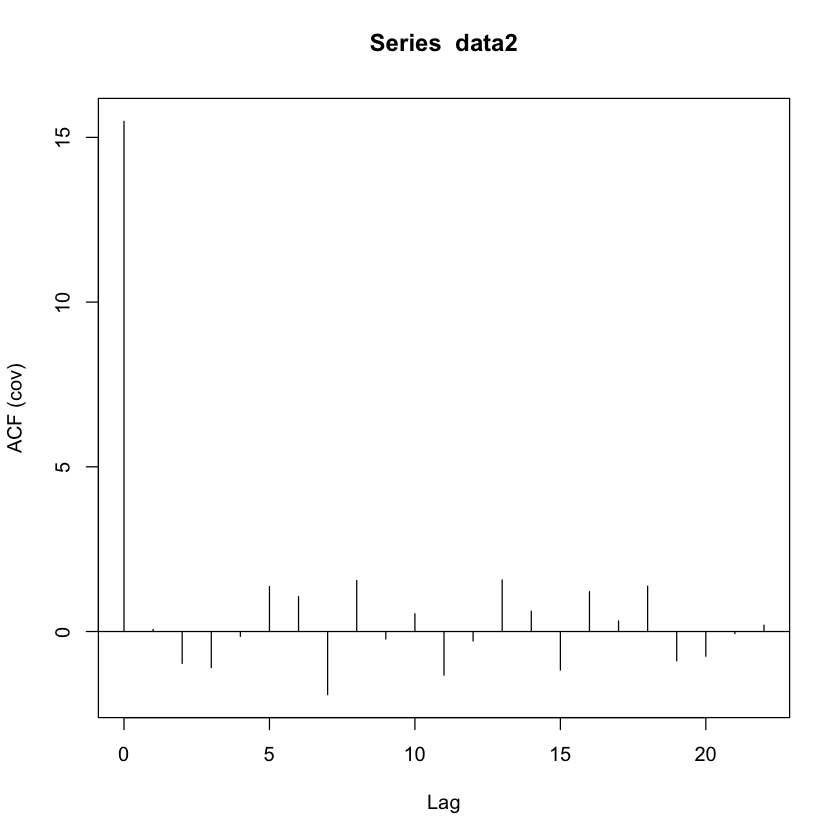

In [23]:
acf(data2,type="cov")

* 弱定常性では、自己共分散がラグhのみに依存していることが必要だが、、

# 3-3 自己回帰モデルの導入

## AR(1)を当てはめる

In [24]:
ar(data2,aic=F,order.max=1)


Call:
ar(x = data2, aic = F, order.max = 1)

Coefficients:
     1  
0.0042  

Order selected 1  sigma^2 estimated as  15.68

In [25]:
(1-0.0042)*mean(data2)

[1] 0.6324305

$$
r_t = 0.632 + 0.0042\times r_{t-1} +e_t
$$

* そもそも、前述のLjung-Box検定でも自己相関性が見当たらなかった。aic=Tでやってみる


In [26]:
ar(data2,aic=T,order.max=1)


Call:
ar(x = data2, aic = T, order.max = 1)


Order selected 0  sigma^2 estimated as  15.58

* 選択されたモデルはAR(0)となった。

# 3-4 単位根過程について

前述までで、bitcoinにAR(1)は当てはまらないことがわかった。そのため、以下の話は意味がない（？）と思うが、引き続き進めてみようと思う

## Dickey-Fuller検定
### 価格に対して

In [27]:
adf.test(data$price)


	Augmented Dickey-Fuller Test

data:  data$price
Dickey-Fuller = -0.64072, Lag order = 5, p-value = 0.9739
alternative hypothesis: stationary


* 「データ系列に単位根が存在する」を棄却できない。

### 収益率に対して

In [28]:
adf.test(data2)

Warning message in adf.test(data2):
“p-value smaller than printed p-value”


	Augmented Dickey-Fuller Test

data:  data2
Dickey-Fuller = -4.9485, Lag order = 5, p-value = 0.01
alternative hypothesis: stationary


* 収益率は単位根を有していなそう。

# 4-1 自己回帰モデルの当てはめ残差を調べる

In [29]:
ar.fit1 = ar(data2)
ar.fit1


Call:
ar(x = data2)


Order selected 0  sigma^2 estimated as  15.58

* AICを元にした選ばれた次数は0

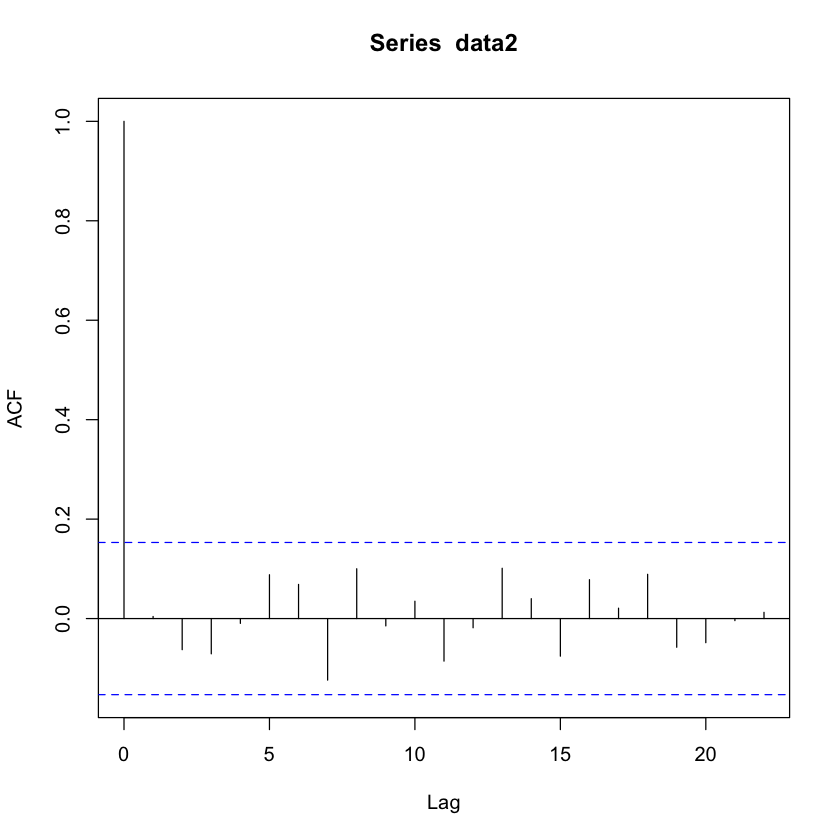

In [30]:
acf(data2)

* コレログラムを見ても、強い自己相関は見られない。AICによる自動選択結果とも一致する

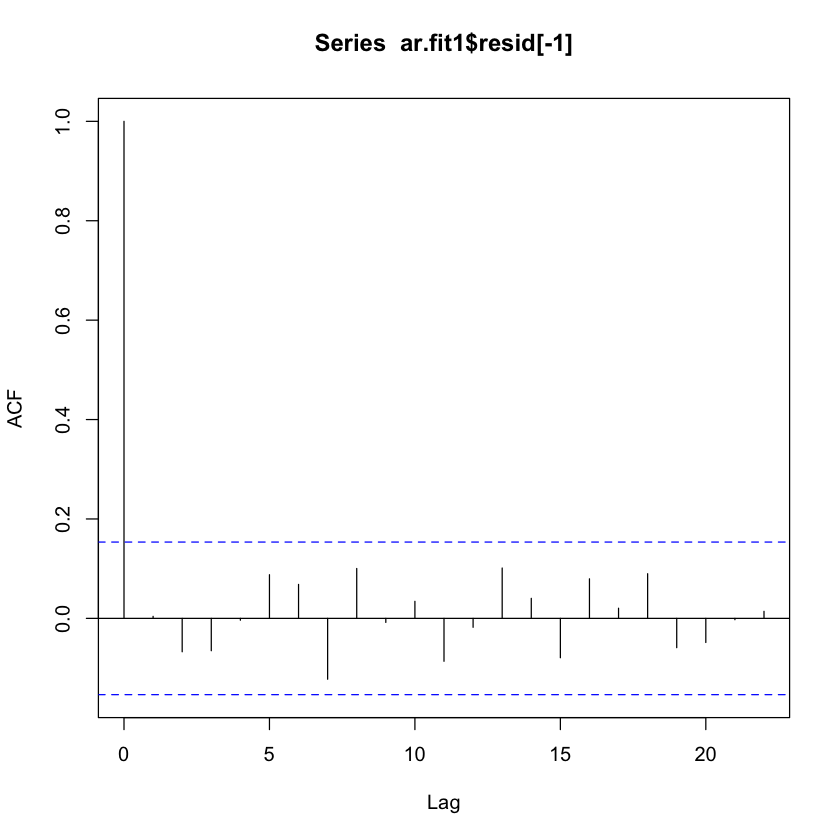

In [31]:
acf(ar.fit1$resid[-1])

# 4-2 ARCHモデルとGARCHモデル

In [32]:
library(fGarch)

Loading required package: timeDate
Loading required package: timeSeries
Loading required package: fBasics


Rmetrics Package fBasics
Analysing Markets and calculating Basic Statistics
Copyright (C) 2005-2014 Rmetrics Association Zurich
Educational Software for Financial Engineering and Computational Science
Rmetrics is free software and comes with ABSOLUTELY NO WARRANTY.
https://www.rmetrics.org --- Mail to: info@rmetrics.org


## AR(1)＋ARCHモデルの当てはめ

In [33]:
arch.fit1 = garchFit(~arma(1,0)+garch(1,0),data=data2,trace=F)
arch.fit1


Title:
 GARCH Modelling 

Call:
 garchFit(formula = ~arma(1, 0) + garch(1, 0), data = data2, trace = F) 

Mean and Variance Equation:
 data ~ arma(1, 0) + garch(1, 0)
<environment: 0x7ff363c4ce98>
 [data = data2]

Conditional Distribution:
 norm 

Coefficient(s):
       mu        ar1      omega     alpha1  
 0.804882  -0.040429  11.284632   0.271363  

Std. Errors:
 based on Hessian 

Error Analysis:
        Estimate  Std. Error  t value Pr(>|t|)    
mu       0.80488     0.31479    2.557   0.0106 *  
ar1     -0.04043     0.09717   -0.416   0.6774    
omega   11.28463     1.54976    7.282  3.3e-13 ***
alpha1   0.27136     0.11927    2.275   0.0229 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Log Likelihood:
 -450.2188    normalized:  -2.745236 

Description:
 Wed Jun 14 18:46:01 2017 by user:  


* ar1のp値が0.6674と高くなっている。AR(1)部分以外は信頼できる

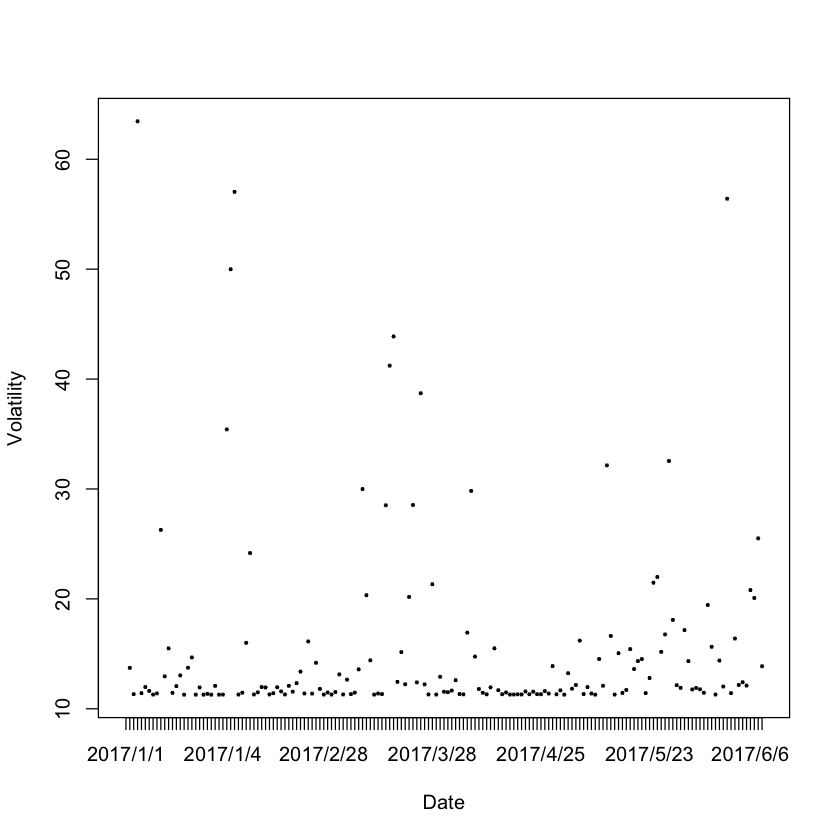

In [34]:
plot(data$date[-1],arch.fit1@sigma.t^2,type="l",xlab="Date",ylab="Volatility")

* type="l"にしても、線にならない。（日付を入れてるから？）

### 標準化残差の評価

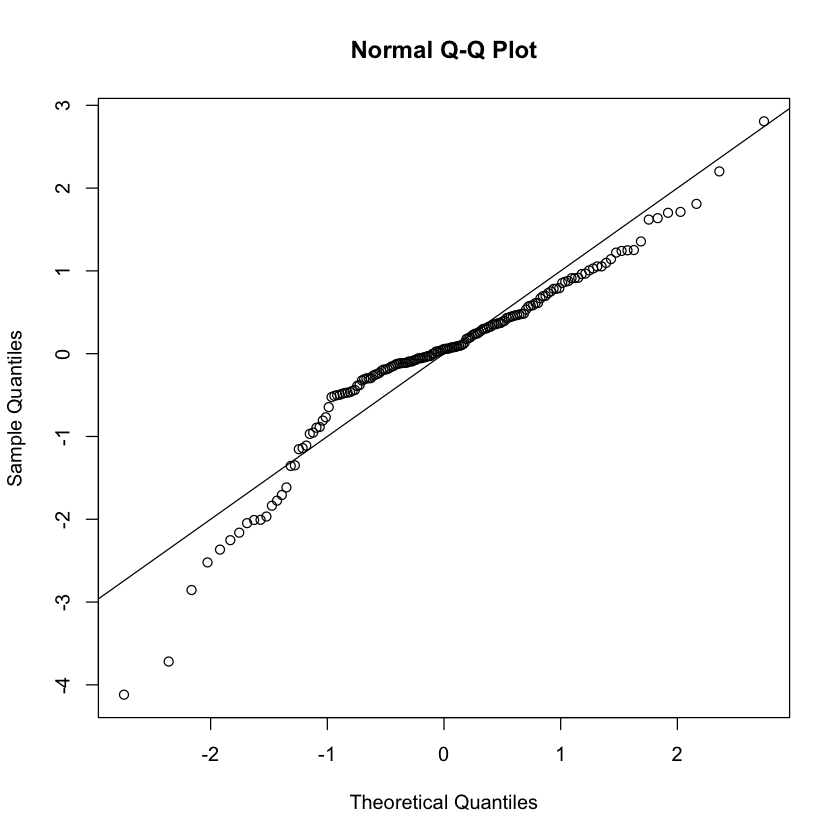

In [35]:
qqnorm(arch.fit1@residuals/arch.fit1@sigma.t)
abline(0,1)

In [36]:
shapiro.test(arch.fit1@residuals/arch.fit1@sigma.t)


	Shapiro-Wilk normality test

data:  arch.fit1@residuals/arch.fit1@sigma.t
W = 0.92467, p-value = 1.538e-07


* 帰無仮説「標本は正規分布している」は棄却される

## AR(1)+GARCH(1,1)を当てはめ

In [37]:
arch.fit2 = garchFit(~arma(1,0)+garch(1,1),data=data2,trace=F)
arch.fit2


Title:
 GARCH Modelling 

Call:
 garchFit(formula = ~arma(1, 0) + garch(1, 1), data = data2, trace = F) 

Mean and Variance Equation:
 data ~ arma(1, 0) + garch(1, 1)
<environment: 0x7ff365f6d590>
 [data = data2]

Conditional Distribution:
 norm 

Coefficient(s):
      mu       ar1     omega    alpha1     beta1  
0.715765  0.040075  0.649642  0.221863  0.758727  

Std. Errors:
 based on Hessian 

Error Analysis:
        Estimate  Std. Error  t value Pr(>|t|)    
mu       0.71576     0.23844    3.002 0.002684 ** 
ar1      0.04008     0.08968    0.447 0.654968    
omega    0.64964     0.34553    1.880 0.060091 .  
alpha1   0.22186     0.06727    3.298 0.000974 ***
beta1    0.75873     0.04988   15.212  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Log Likelihood:
 -439.3396    normalized:  -2.6789 

Description:
 Wed Jun 14 18:46:01 2017 by user:  


* AR1とomegaのp値が高い

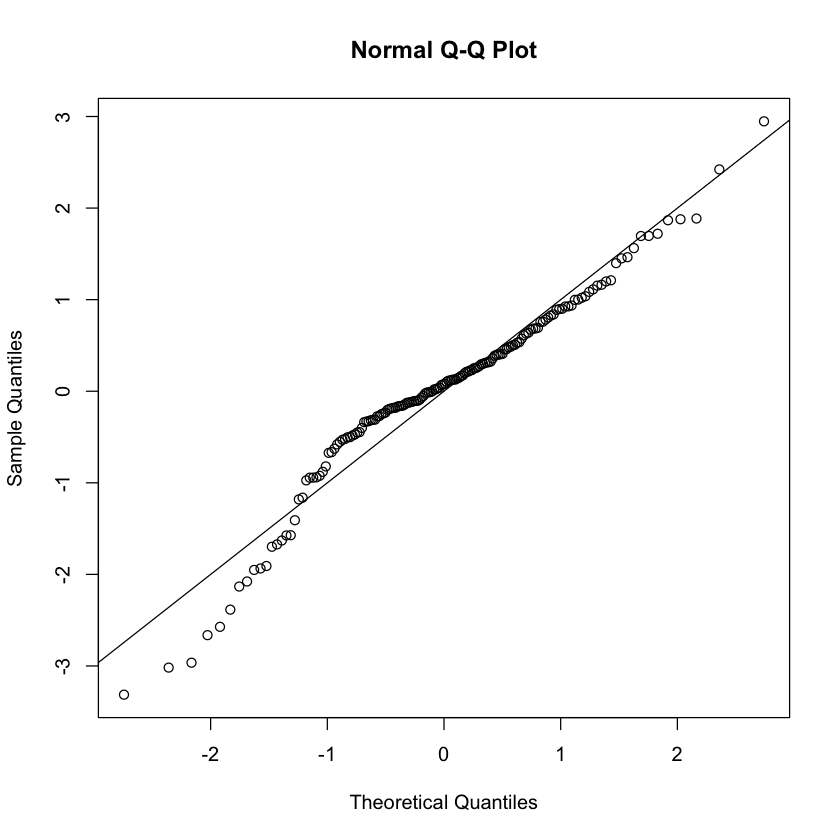

In [38]:
qqnorm(arch.fit2@residuals/arch.fit2@sigma.t)
abline(0,1)

In [39]:
shapiro.test(arch.fit2@residuals/arch.fit2@sigma.t)


	Shapiro-Wilk normality test

data:  arch.fit2@residuals/arch.fit2@sigma.t
W = 0.9547, p-value = 3.737e-05


* 「正規分布する」という帰無仮説は棄却される

# 4-3 非正規な標準化残差をもつGARCH

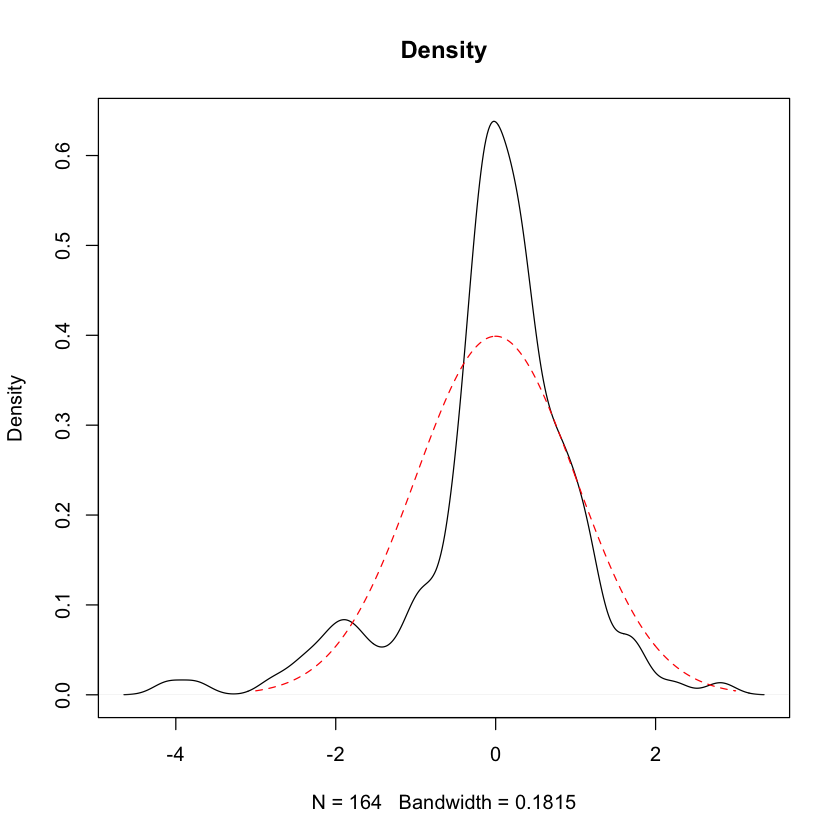

In [41]:
plot(density(arch.fit2@residuals/arch.fit1@sigma.t),main="Density")
lines(-300:300/100,dnorm(-300:300/100,0,1),lty=2,col=2)

## skew normalを当てはめてみる

In [42]:
arch.fit3 = garchFit(~garch(1,0),data=data2,cond.dist="snorm",trace=F)
arch.fit3


Title:
 GARCH Modelling 

Call:
 garchFit(formula = ~garch(1, 0), data = data2, cond.dist = "snorm", 
    trace = F) 

Mean and Variance Equation:
 data ~ garch(1, 0)
<environment: 0x7ff363ebfb40>
 [data = data2]

Conditional Distribution:
 snorm 

Coefficient(s):
      mu     omega    alpha1      skew  
 0.56864  11.40817   0.19056   0.75182  

Std. Errors:
 based on Hessian 

Error Analysis:
        Estimate  Std. Error  t value Pr(>|t|)    
mu        0.5686      0.2887    1.970   0.0489 *  
omega    11.4082      1.5457    7.380 1.58e-13 ***
alpha1    0.1906      0.0896    2.127   0.0334 *  
skew      0.7518      0.0668   11.255  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Log Likelihood:
 -444.6747    normalized:  -2.711431 

Description:
 Wed Jun 14 18:49:29 2017 by user:  


* どの係数もp値は<0.05。全ての係数に意味がある。

## 標準化残差の解釈

In [43]:
library(lattice)

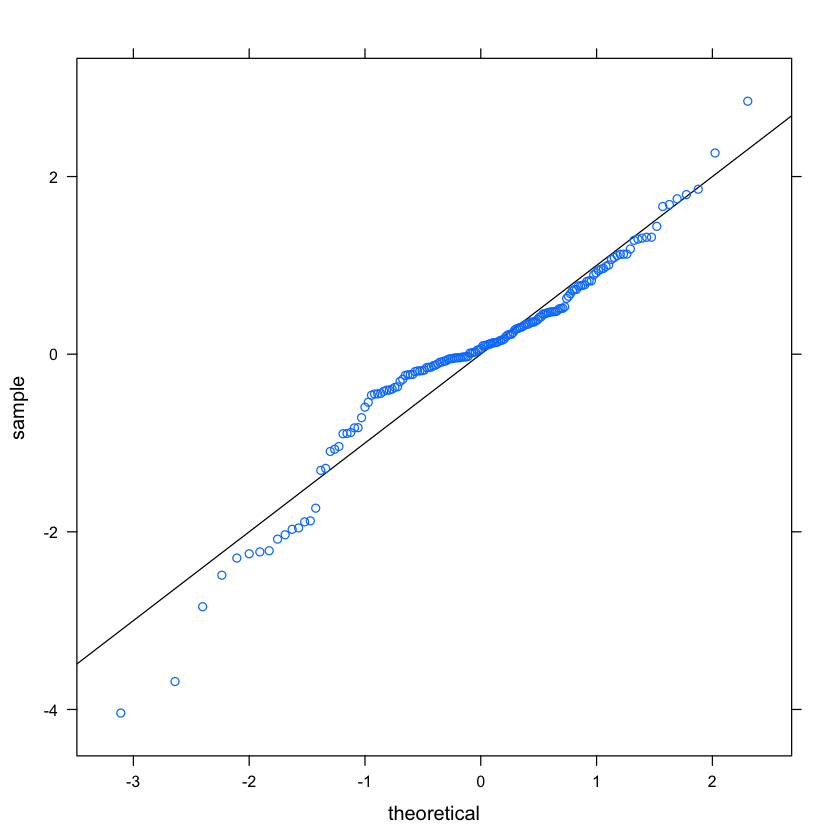

In [45]:
qqmath(~arch.fit3@residuals/arch.fit3@sigma.t,distribution=function(p){qsnorm(p,xi=0.7518)},
      abline=c(0,1),xlab="theoretical",ylab="sample")


* 若干当てはまりは良くなった？

# 4.4 シミュレーション

In [46]:
length(data$price)

[1] 165

In [48]:
spec=garchSpec(model=list(mu=arch.fit3@fit$coef[1],omega=arch.fit3@fit$coef[2],
                         alpha=arch.fit3@fit$coef[3],beta=0,skew=arch.fit3@fit$coef[4]),
                         cond.dist=c("snorm"))
PL=NULL;Price=data$price[165]
for(i in 1:10000){PL[i]=Price*exp(sum(garchSim(spec,10))/100)}
PL=PL-Price

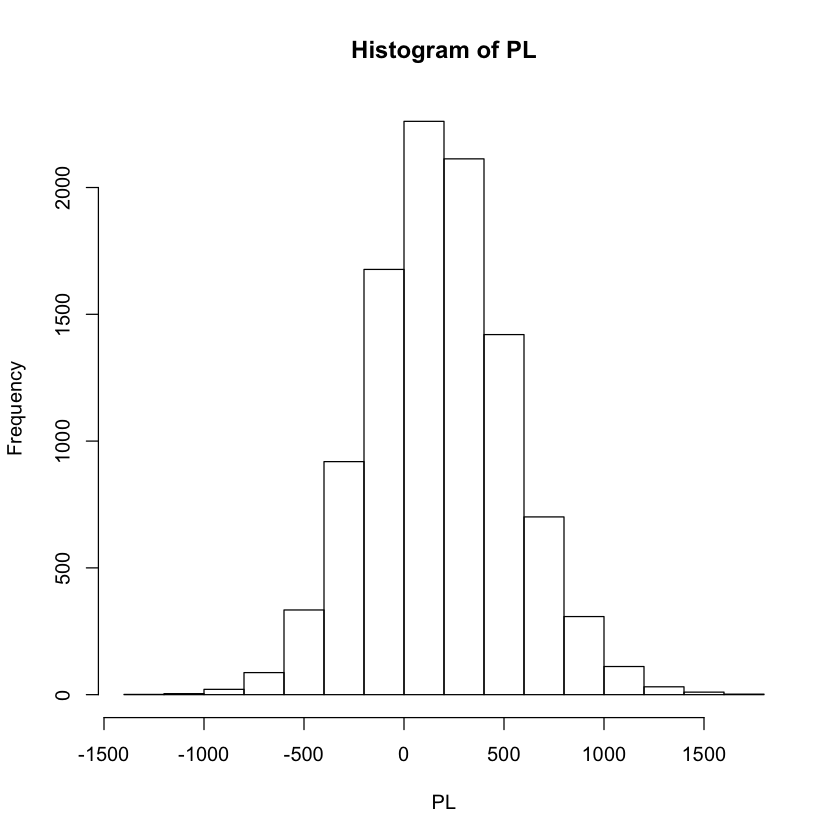

In [51]:
hist(PL)

# まとめ
* Ljung-Box検定で帰無仮説「自己相関関係を有していない」は棄却されないなら、ARモデルは導入できない（？）
* ARCH、GARCHそのものは、分散不均一性を説明するモデルのため、自己相関関係を有している、いないに関わらず、導入を検討することは可能（？）